In [40]:
from bertopic import BERTopic
import pandas as pd
from datetime import datetime

doc_list = []
date_list = []
for i in range(1, 2594):
    with open(f"./News/semiconductor/content/{i}.txt", 'r', encoding='UTF-8') as textfile:
        doc_list.append(textfile.read())
    with open(f"./News/semiconductor/date/{i}.txt", 'r', encoding='UTF-8') as textfile:
        date_list.append(pd.to_datetime(textfile.read(), format="%Y/%m/%d"))
        date_list[-1] = datetime(date_list[-1].year, (date_list[-1].quarter - 1)*3 + 1, 1)

In [28]:
bertopic_model = BERTopic()
topics, probs = bertopic_model.fit_transform(doc_list)

    Topic  Count
3      -1    501
37      0    132
12      1    130
0       2    122
4       3     97
..    ...    ...
5      60     12
43     61     12
57     62     11
59     63     10
22     64     10

[66 rows x 2 columns]


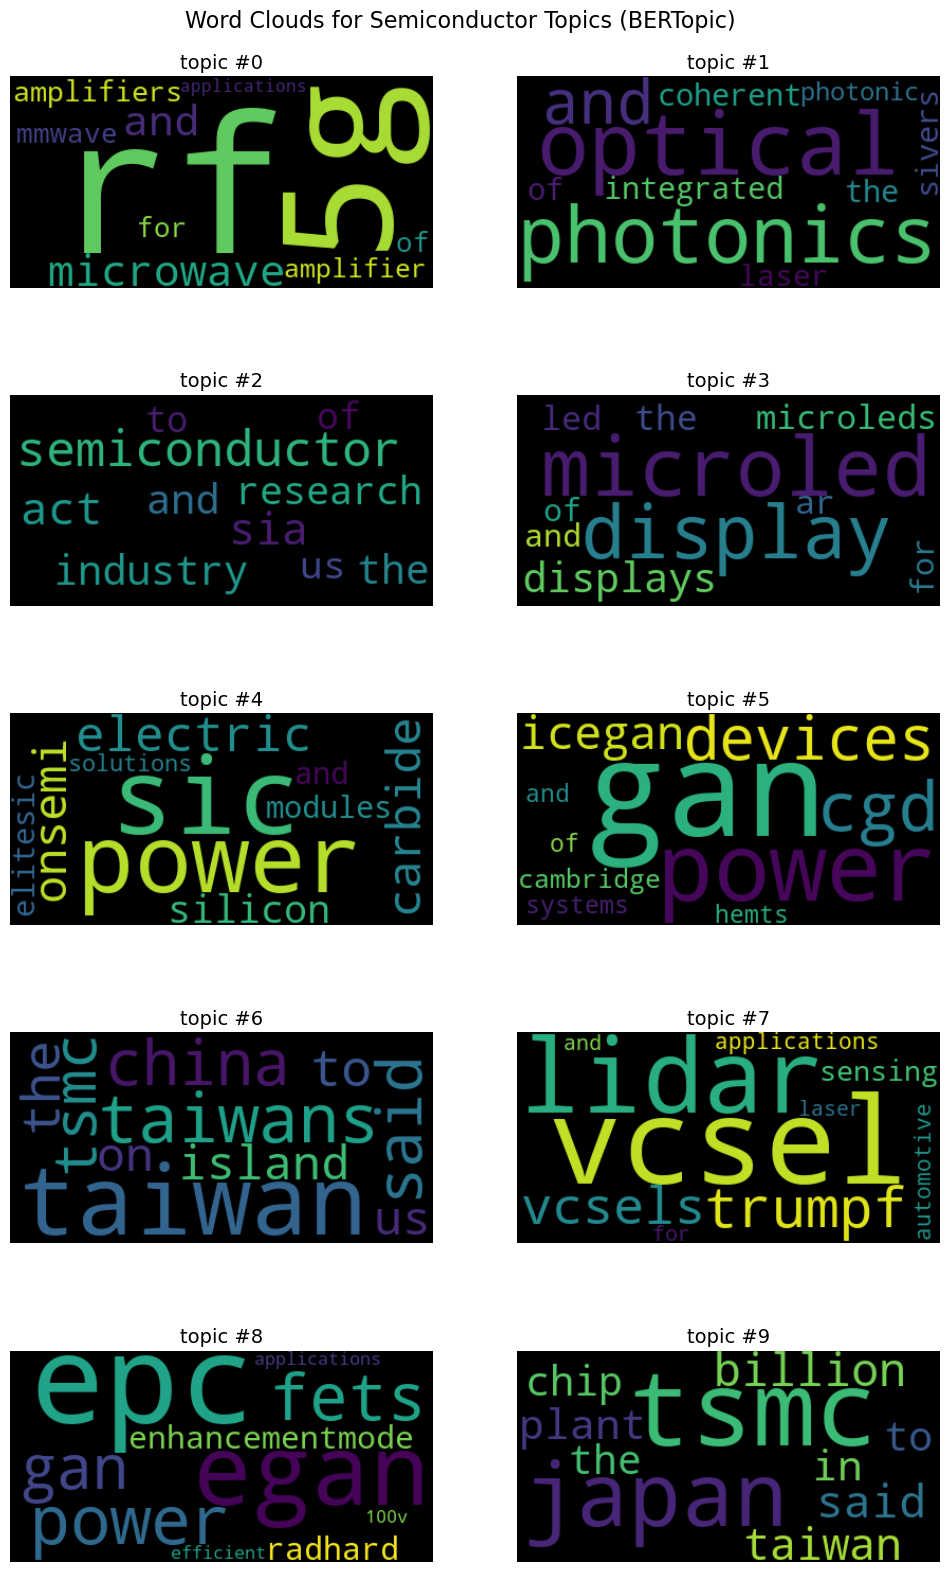

In [79]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
    
# Show word cloud
plt.figure(figsize=(12, 20))
plt.suptitle("Word Clouds for Semiconductor Topics (BERTopic)", y=0.9, fontsize=16)

print(bertopic_model.get_topic_freq())
for i in range(10):
    freq_dict = {term: freq for (term, freq) in bertopic_model.get_topic(i)}
    wordcloud = WordCloud().generate_from_frequencies(freq_dict)
    
    plt.subplot(5, 2, i + 1)
    plt.axis("off")
    plt.title(f"topic #{i}", fontsize=14)
    plt.imshow(wordcloud, interpolation="bilinear")
    
plt.show()

In [80]:
topics_over_time = bertopic_model.topics_over_time(doc_list, date_list)
bertopic_model.visualize_topics_over_time(topics_over_time, top_n_topics=10,
                                          title="Semiconductor Topics from 22Q1 to 23Q4 (BERTopic)", width=1000)